In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def histogram_equalization(img):
    # Convert image to grayscale if it is not
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Flatten the image to a 1D array
    img_flat = img.flatten()
    
    # Compute histogram
    hist, bins = np.histogram(img_flat, bins=256, range=(0, 256))
    
    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize CDF
    cdf_normalized = cdf * 255 / cdf[-1]
    
    # Map the original gray levels to equalized levels
    img_equalized = np.interp(img_flat, bins[:-1], cdf_normalized).astype(np.uint8)
    
    # Reshape back to the original image shape
    img_equalized = img_equalized.reshape(img.shape)
    
    return img_equalized

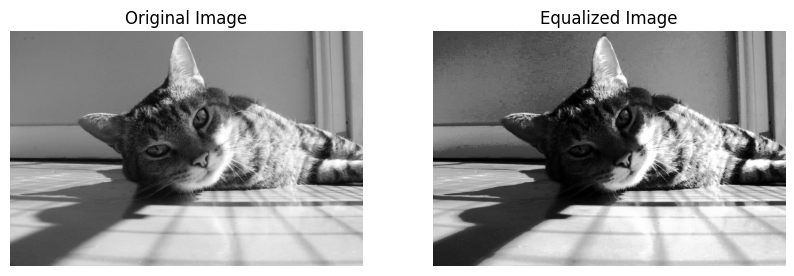

In [3]:
# Load an example image
img = cv2.imread('./cat.jpg')

# Perform histogram equalization
equalized_img = histogram_equalization(img)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

plt.show()